In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('dataorders.csv')
data

,Unnamed: 0,customer_id,orders_number,payment_value,review_score,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,5.0,116.0
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,4.0,119.0
2,2,0000f46a3911fa3c0805444483337064,1,86.22,3.0,542.0
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,326.0
4,4,0004aac84e0df4da2b147fca70cf8255,1,196.89,5.0,293.0
...,...,...,...,...,...,...
96090,96090,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,5.0,452.0
96091,96091,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,4.0,267.0
96092,96092,ffff371b4d645b6ecea244b27531430a,1,112.46,5.0,573.0
96093,96093,ffff5962728ec6157033ef9805bacc48,1,133.69,5.0,124.0


In [2]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
data2=imputer.fit_transform(data[['orders_number', 'payment_value', 'review_score','recency']])
data2

array([[  1.  , 141.9 ,   5.  , 116.  ],
       [  1.  ,  27.19,   4.  , 119.  ],
       [  1.  ,  86.22,   3.  , 542.  ],
       ...,
       [  1.  , 112.46,   5.  , 573.  ],
       [  1.  , 133.69,   5.  , 124.  ],
       [  1.  ,  71.56,   5.  , 488.  ]])

In [3]:
data[['orders_number', 'payment_value', 'review_score','recency']]=data2
data

,Unnamed: 0,customer_id,orders_number,payment_value,review_score,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,5.0,116.0
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,4.0,119.0
2,2,0000f46a3911fa3c0805444483337064,1.0,86.22,3.0,542.0
3,3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,4.0,326.0
4,4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,5.0,293.0
...,...,...,...,...,...,...
96090,96090,fffcf5a5ff07b0908bd4e2dbc735a684,1.0,2067.42,5.0,452.0
96091,96091,fffea47cd6d3cc0a88bd621562a9d061,1.0,84.58,4.0,267.0
96092,96092,ffff371b4d645b6ecea244b27531430a,1.0,112.46,5.0,573.0
96093,96093,ffff5962728ec6157033ef9805bacc48,1.0,133.69,5.0,124.0


<AxesSubplot:>

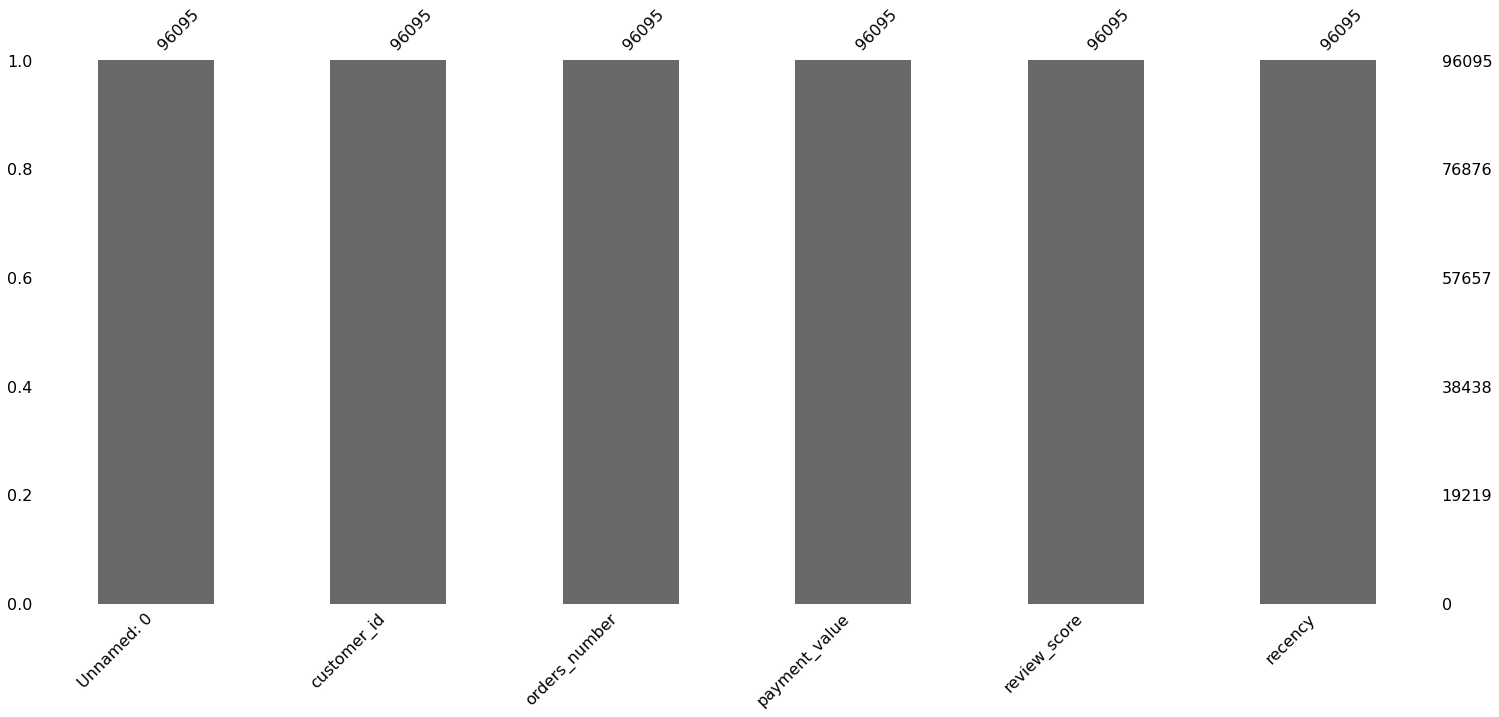

In [4]:
import missingno as msno
%matplotlib inline
msno.bar(data)

Text(0.5, 1.0, 'recency')

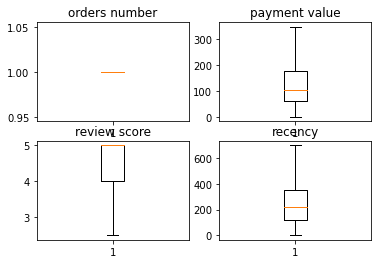

In [5]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(data['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(data['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(data['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(data['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

In [6]:
datanum2=data[['orders_number', 'payment_value', 'review_score','recency']]
datanum2['review_score']=datanum2['review_score'].astype(float)
datanum2

C:\Users\theop\AppData\Local\Temp/ipykernel_10592/2661982131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanum2['review_score']=datanum2['review_score'].astype(float)


,orders_number,payment_value,review_score,recency
0,1.0,141.90,5.0,116.0
1,1.0,27.19,4.0,119.0
2,1.0,86.22,3.0,542.0
3,1.0,43.62,4.0,326.0
4,1.0,196.89,5.0,293.0
...,...,...,...,...
96090,1.0,2067.42,5.0,452.0
96091,1.0,84.58,4.0,267.0
96092,1.0,112.46,5.0,573.0
96093,1.0,133.69,5.0,124.0


In [7]:
def normalize(arr):
    return (arr-arr.mean())/arr.std()

In [8]:
datanorm=normalize(datanum2)
datanorm

,orders_number,payment_value,review_score,recency
0,-0.176841,-0.076603,0.684937,-0.833028
1,-0.176841,-0.599202,-0.061979,-0.813445
2,-0.176841,-0.330271,-0.808894,1.947754
3,-0.176841,-0.524350,-0.061979,0.537780
4,-0.176841,0.173923,0.684937,0.322367
...,...,...,...,...
96090,-0.176841,8.695743,0.684937,1.360265
96091,-0.176841,-0.337743,-0.061979,0.152648
96092,-0.176841,-0.210726,0.684937,2.150112
96093,-0.176841,-0.114006,0.684937,-0.780807


Text(0.5, 1.0, 'recency')

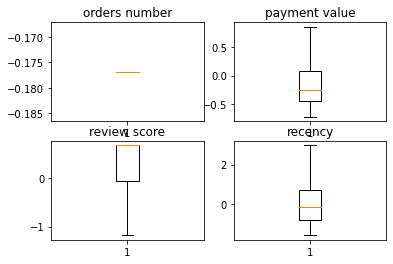

In [9]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()

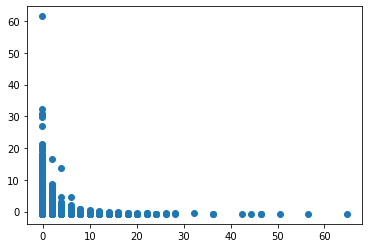

In [10]:
import matplotlib
import matplotlib.pyplot as plt
datanum=datanorm[['orders_number', 'payment_value']]
plt.scatter(datanum['orders_number'], datanum['payment_value'])

[[ 3.90286125e-03 -1.38255455e-01]
 [-1.11000770e-01  3.93210544e+00]]


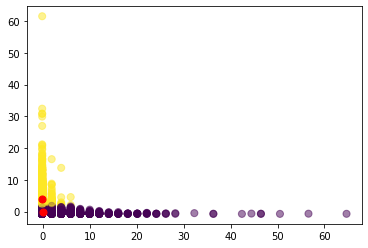

[[ 2.75984772 -0.25585603]
 [-0.17684111 -0.12909751]
 [-0.13323463  3.96475925]]


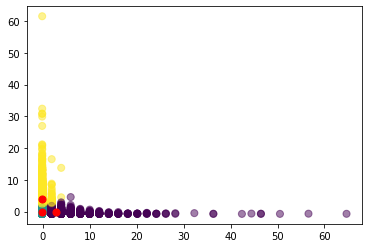

[[-0.17684111 -0.12907404]
 [-0.13631873  3.96808281]
 [19.29450894 -0.58632434]
 [ 2.47800034 -0.24802415]]


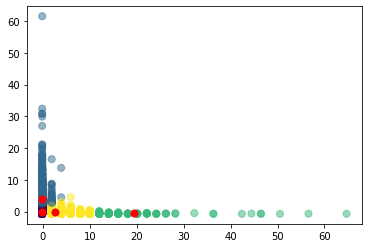

In [11]:
import time
from pandas import DataFrame
from sklearn.cluster import KMeans
for i in range(2, 5):
    kmeans = KMeans(n_clusters=i).fit(datanum)
    centroids = kmeans.cluster_centers_
    print(centroids)
    plt.scatter(datanum['orders_number'], datanum['payment_value'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()

In [12]:
datanorm

,orders_number,payment_value,review_score,recency
0,-0.176841,-0.076603,0.684937,-0.833028
1,-0.176841,-0.599202,-0.061979,-0.813445
2,-0.176841,-0.330271,-0.808894,1.947754
3,-0.176841,-0.524350,-0.061979,0.537780
4,-0.176841,0.173923,0.684937,0.322367
...,...,...,...,...
96090,-0.176841,8.695743,0.684937,1.360265
96091,-0.176841,-0.337743,-0.061979,0.152648
96092,-0.176841,-0.210726,0.684937,2.150112
96093,-0.176841,-0.114006,0.684937,-0.780807


In [13]:
datarfm=datanorm[['orders_number','payment_value','recency']]
datarfm

,orders_number,payment_value,recency
0,-0.176841,-0.076603,-0.833028
1,-0.176841,-0.599202,-0.813445
2,-0.176841,-0.330271,1.947754
3,-0.176841,-0.524350,0.537780
4,-0.176841,0.173923,0.322367
...,...,...,...
96090,-0.176841,8.695743,1.360265
96091,-0.176841,-0.337743,0.152648
96092,-0.176841,-0.210726,2.150112
96093,-0.176841,-0.114006,-0.780807


from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=10, min_samples=100, algorithm='ball_tree', metric='haversine').fit(datanum)

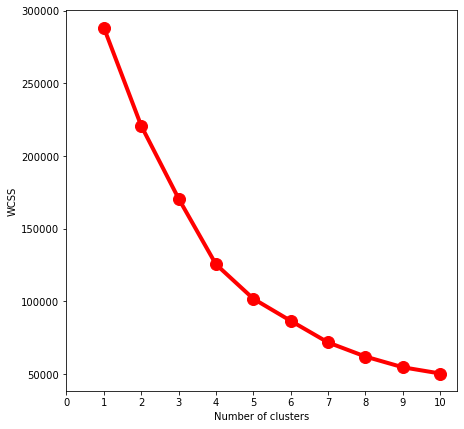

In [14]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(datarfm)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

from sklearn.metrics import silhouette_score
for k in range(2, 6):
    model = KMeans(n_clusters = k,init = 'k-means++')
    model.fit(datanorm)
    pred = model.predict(datanorm)
    score = silhouette_score(datanorm, pred, n_jobs=-1)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

C:\Users\theop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

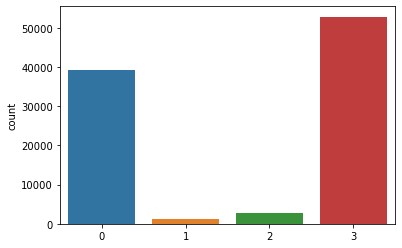

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000, random_state = 0).fit(datarfm)
y_clusters = model.predict(datarfm)
sns.countplot(y_clusters)

In [16]:
datarfm['clusters']=y_clusters
datarfm

,orders_number,payment_value,recency,clusters
0,-0.176841,-0.076603,-0.833028,3
1,-0.176841,-0.599202,-0.813445,3
2,-0.176841,-0.330271,1.947754,0
3,-0.176841,-0.524350,0.537780,0
4,-0.176841,0.173923,0.322367,0
...,...,...,...,...
96090,-0.176841,8.695743,1.360265,2
96091,-0.176841,-0.337743,0.152648,0
96092,-0.176841,-0.210726,2.150112,0
96093,-0.176841,-0.114006,-0.780807,3


Text(0.5, 1.0, 'recency')

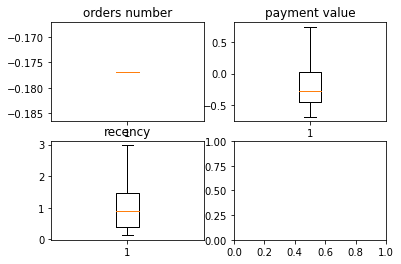

In [17]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datarfm[datarfm['clusters']==0]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datarfm[datarfm['clusters']==0]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datarfm[datarfm['clusters']==0]['recency'], showfliers=False)
boxplot[1, 0].set_title("recency")

Text(0.5, 1.0, 'recency')

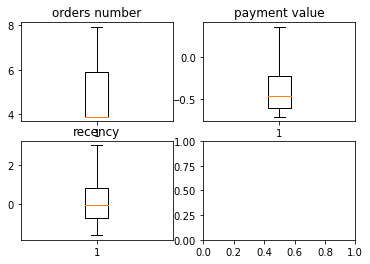

In [18]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datarfm[datarfm['clusters']==1]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datarfm[datarfm['clusters']==1]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datarfm[datarfm['clusters']==1]['recency'], showfliers=False)
boxplot[1, 0].set_title("recency")

Text(0.5, 1.0, 'recency')

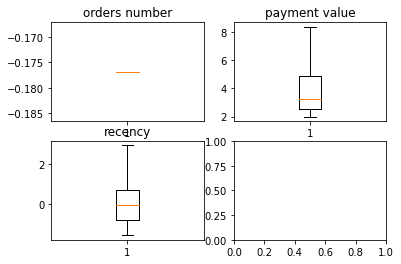

In [19]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datarfm[datarfm['clusters']==2]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datarfm[datarfm['clusters']==2]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datarfm[datarfm['clusters']==2]['recency'], showfliers=False)
boxplot[1, 0].set_title("recency")

Text(0.5, 1.0, 'recency')

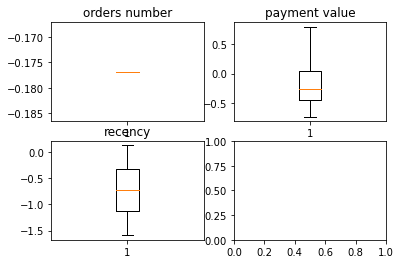

In [20]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datarfm[datarfm['clusters']==3]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datarfm[datarfm['clusters']==3]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datarfm[datarfm['clusters']==3]['recency'], showfliers=False)
boxplot[1, 0].set_title("recency")

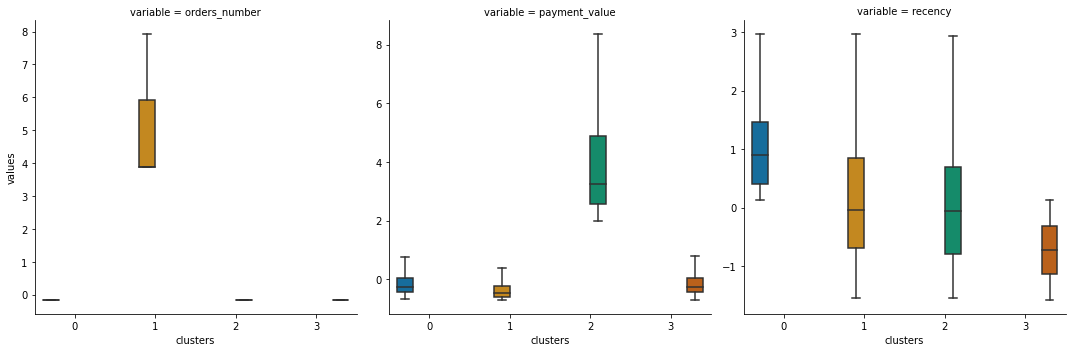

In [21]:
df_long = datarfm.melt(id_vars='clusters', value_vars=datarfm.columns[:-1], var_name='variable', value_name='values')

sns.catplot(kind='box', data=df_long, 
            col='variable', y='values', x='clusters', hue='clusters', palette="colorblind", sharey=False,showfliers = False)
plt.tight_layout()
plt.show()

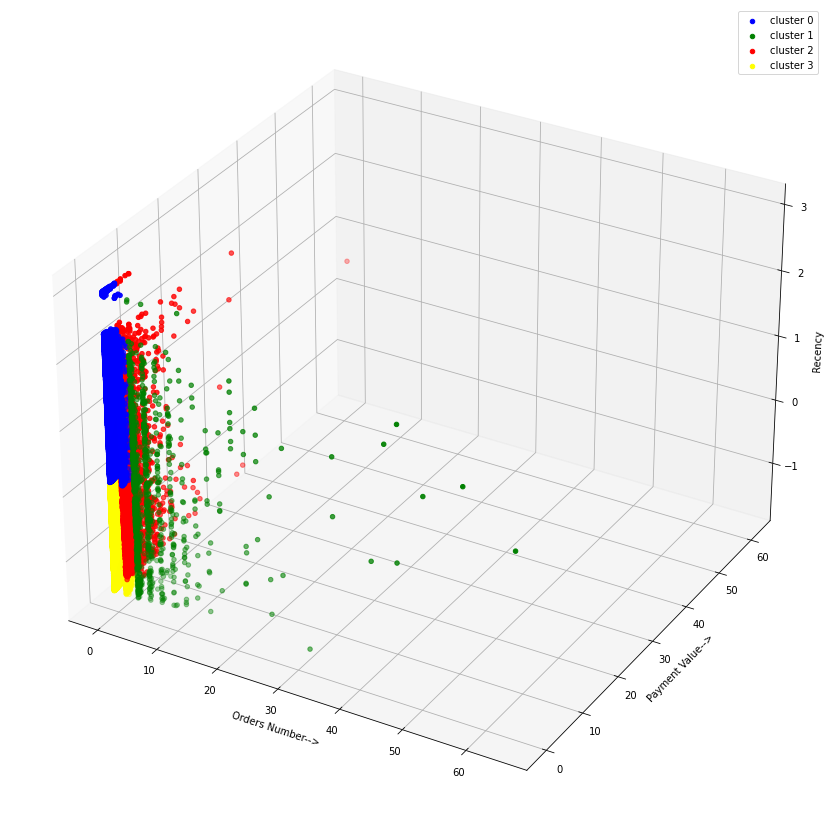

In [22]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(datarfm[y_clusters == 0]["orders_number"],datarfm[y_clusters == 0]["payment_value"],datarfm[y_clusters == 0]["recency"], color = 'blue', label = "cluster 0")
ax.scatter3D(datarfm[y_clusters == 1]["orders_number"],datarfm[y_clusters == 1]["payment_value"],datarfm[y_clusters == 1]["recency"], color = 'green', label = "cluster 1")
ax.scatter3D(datarfm[y_clusters == 2]["orders_number"],datarfm[y_clusters == 2]["payment_value"],datarfm[y_clusters == 2]["recency"], color = 'red', label = "cluster 2")
ax.scatter3D(datarfm[y_clusters == 3]["orders_number"],datarfm[y_clusters == 3]["payment_value"],datarfm[y_clusters == 3]["recency"], color = 'yellow', label = "cluster 3")
ax.set_xlabel('Orders Number-->')
ax.set_ylabel('Payment Value-->')
ax.set_zlabel('Recency')
ax.legend()
plt.show()

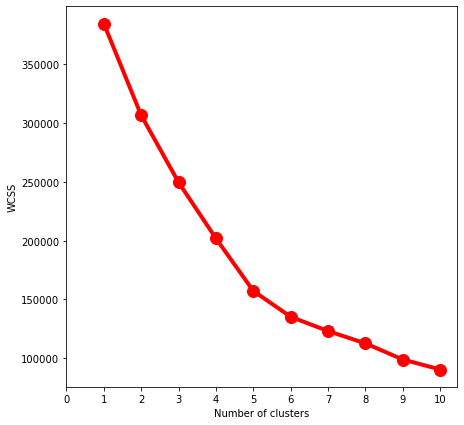

In [23]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(datanorm)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
for k in range(2, 7):
    model = KMeans(n_clusters = k,init = 'k-means++')
    model.fit(datanorm)
    pred = model.predict(datanorm)
    score = silhouette_score(datanorm, pred, n_jobs=-1)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.373
Silhouette Score for k = 3: 0.348
Silhouette Score for k = 4: 0.369
Silhouette Score for k = 5: 0.384
Silhouette Score for k = 6: 0.396


C:\Users\theop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

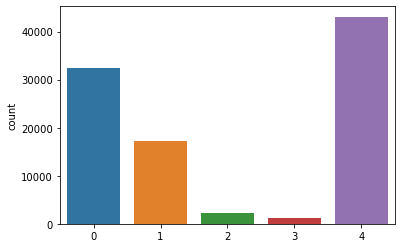

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 1000, random_state = 0).fit(datanorm)
y_clusters = model.predict(datanorm)
sns.countplot(y_clusters)

In [26]:
datanorm['clusters']=y_clusters
datanorm

,orders_number,payment_value,review_score,recency,clusters
0,-0.176841,-0.076603,0.684937,-0.833028,4
1,-0.176841,-0.599202,-0.061979,-0.813445,4
2,-0.176841,-0.330271,-0.808894,1.947754,0
3,-0.176841,-0.524350,-0.061979,0.537780,0
4,-0.176841,0.173923,0.684937,0.322367,0
...,...,...,...,...,...
96090,-0.176841,8.695743,0.684937,1.360265,2
96091,-0.176841,-0.337743,-0.061979,0.152648,0
96092,-0.176841,-0.210726,0.684937,2.150112,0
96093,-0.176841,-0.114006,0.684937,-0.780807,4


Text(0.5, 1.0, 'recency')

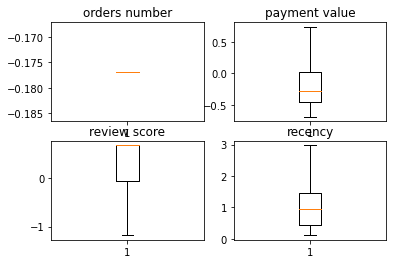

In [27]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm[datanorm['clusters']==0]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm[datanorm['clusters']==0]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm[datanorm['clusters']==0]['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm[datanorm['clusters']==0]['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

Text(0.5, 1.0, 'recency')

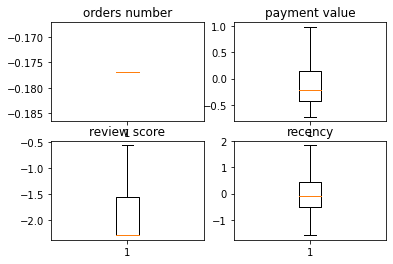

In [28]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm[datanorm['clusters']==1]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm[datanorm['clusters']==1]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm[datanorm['clusters']==1]['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm[datanorm['clusters']==1]['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

Text(0.5, 1.0, 'recency')

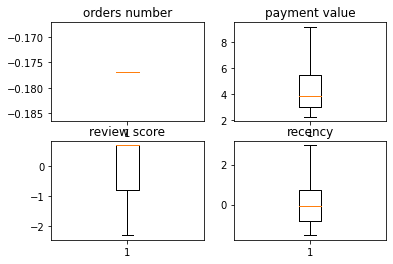

In [29]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm[datanorm['clusters']==2]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm[datanorm['clusters']==2]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm[datanorm['clusters']==2]['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm[datanorm['clusters']==2]['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

Text(0.5, 1.0, 'recency')

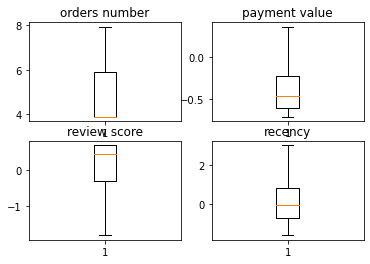

In [30]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm[datanorm['clusters']==3]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm[datanorm['clusters']==3]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm[datanorm['clusters']==3]['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm[datanorm['clusters']==3]['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

Text(0.5, 1.0, 'recency')

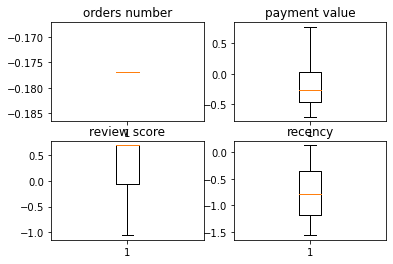

In [31]:
figure, boxplot = plt.subplots(2, 2)
boxplot[0, 0].boxplot(datanorm[datanorm['clusters']==4]['orders_number'], showfliers=False) 
boxplot[0, 0].set_title("orders number")
boxplot[0, 1].boxplot(datanorm[datanorm['clusters']==4]['payment_value'], showfliers=False) 
boxplot[0, 1].set_title("payment value")
boxplot[1, 0].boxplot(datanorm[datanorm['clusters']==4]['review_score'], showfliers=False)
boxplot[1, 0].set_title("review score")
boxplot[1, 1].boxplot(datanorm[datanorm['clusters']==4]['recency'], showfliers=False)
boxplot[1, 1].set_title("recency")

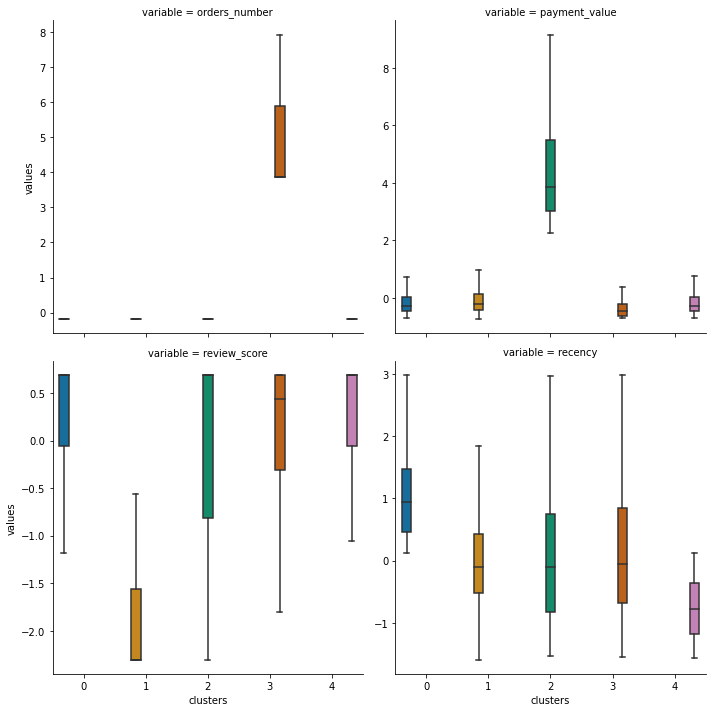

In [32]:
df_long = datanorm.melt(id_vars='clusters', value_vars=datanorm.columns[:-1], var_name='variable', value_name='values')

g=sns.catplot(kind='box', data=df_long, 
            col='variable', y='values', x='clusters', hue='clusters', palette="colorblind", sharey=False,showfliers = False, col_wrap=2)
plt.tight_layout()
plt.show()